In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss

from sklearn.model_selection import cross_val_score
from sklearn import preprocessing, metrics, svm

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("datasets/hcvdat0.csv", encoding='UTF-8')

train_df.isnull().sum()

indices      0
Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

# Limpeza dos Dados
No caso da coluna 'indices' como refere-se aos indices não precisar ser analizada. As colunas 'ALB', 'ALT' e 'PROT' como tem apenas um dado faltando podemos usar mediana. Já as colunas, 'ALP' e 'CHOL', que tem 10 ou mais dados faltosos foram retiradas, já que o número de amostras é relativamente grande.

In [3]:
train_df.drop(['indices'], axis=1, inplace = True)

In [4]:
train_df['ALB'].fillna(train_df['ALB'].median(), inplace = True)
train_df['ALT'].fillna(train_df['ALT'].median(), inplace = True)
train_df['PROT'].fillna(train_df['PROT'].median(), inplace = True)

In [5]:
train_df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          0
ALP         18
ALT          0
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         0
dtype: int64

In [6]:
train_df.dropna(inplace = True)

train_df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [7]:
print(train_df['Category'].unique())
print(train_df['Sex'].unique())

['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']
['m' 'f']


# Transformação de colunas textuais em numéricas
As colunas 'Category' e 'Sex' são descritas por texto, entretanto para melhor análise foram transformadas da seguinte forma:

Category era dividida em 5 classes: 0=Blood Donor, 0s=suspect Blood Donor, 1=Hepatitis, 2=Fibrosis, 3=Cirrhosis, que foram enumeradas de 0 a 4 respectivamente.

E Sex dividida em 'm' e 'f', enumeradas com 0 e 1, respecitivamente.

0    364
1    226
Name: Sex, dtype: int64


<AxesSubplot:ylabel='Frequency'>

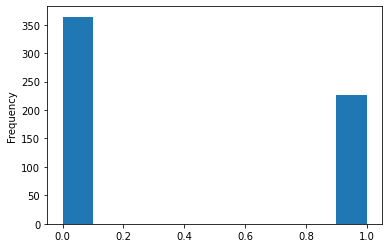

In [8]:
sex_dict = {'m': 0, 'f': 1}
train_df = train_df.replace(sex_dict)

print(train_df['Sex'].value_counts())
train_df['Sex'].plot(kind='hist')

0    526
4     24
2     21
3     12
1      7
Name: Category, dtype: int64


<AxesSubplot:ylabel='Frequency'>

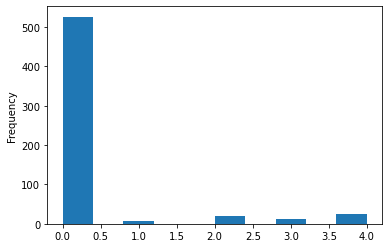

In [9]:
category_dict = {'0=Blood Donor': 0, '0s=suspect Blood Donor': 1, '1=Hepatitis': 2, '2=Fibrosis': 3, '3=Cirrhosis': 4}
train_df = train_df.replace(category_dict)

print(train_df['Category'].value_counts())
train_df['Category'].plot(kind='hist')

# Analisando os Dados
Foram plotados histogramas para melhor entender a quantidade de doadores e não doadores, a idade e sexo dos mesmos.

A partir do histograma plotado acima, percebemos que a quantidade de Doadores é muito maior que a do restante das amostras classificados como: '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'. Estes foram classificados como sendo Não Doadores. Ficando agora com duas classes Doadores e Não doadores.

0    526
1     64
Name: Category, dtype: int64


<AxesSubplot:ylabel='Frequency'>

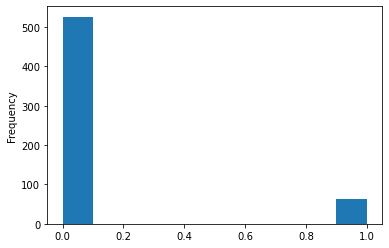

In [10]:
def category_to_binary(x):
    if x == 0:
        return 0
    else:
        return 1
    
train_df['Category'] = train_df['Category'].apply(category_to_binary)

print(train_df['Category'].value_counts())
train_df['Category'].plot(kind='hist')

Também, podemos analizar que a maior parte possue entre 35 a 55 anos.

46    29
48    26
33    24
51    23
52    22
35    21
37    20
44    20
50    20
47    19
56    19
38    19
53    19
43    19
45    19
34    19
49    18
59    17
36    16
32    16
41    16
57    15
39    15
55    14
40    14
42    13
60    12
54    12
58    10
64     9
61     9
62     8
65     7
63     6
68     4
66     4
67     3
70     3
76     2
71     2
74     2
27     1
25     1
77     1
29     1
23     1
Name: Age, dtype: int64


<AxesSubplot:ylabel='Frequency'>

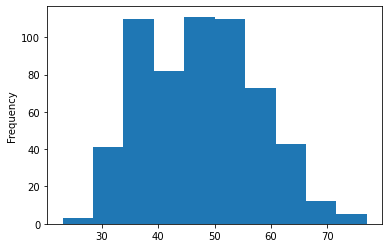

In [11]:
print(train_df['Age'].value_counts())
train_df['Age'].plot(kind='hist')

Ademais, que nota-se que a maior parte da amostra era do sexo masculino.

0    364
1    226
Name: Sex, dtype: int64


<AxesSubplot:ylabel='Frequency'>

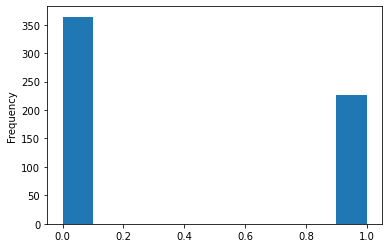

In [12]:
print(train_df['Sex'].value_counts())
train_df['Sex'].plot(kind='hist')

# Verificando presença de Outliers
As classes 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT' e 'PROT' foram chegadas. Percebendo outliers claros principalmente nas celulas 'AST' e 'GGT'. As colunas 'ALB', 'ALP', 'ALT', 'BIL', 'CREA' e 'PROT' possuem quantidades relavantes, entretanto não estão comprometidas pois, podem ser limitadas. E as colunas 'CHE' e 'CHOL' não possuem outliers consideráveis.

<AxesSubplot:title={'center':'ALB'}>

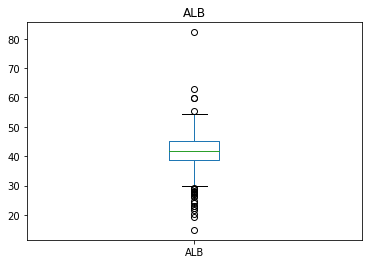

In [13]:
train_df['ALB'].plot(kind='box', title='ALB')

<AxesSubplot:title={'center':'ALP'}>

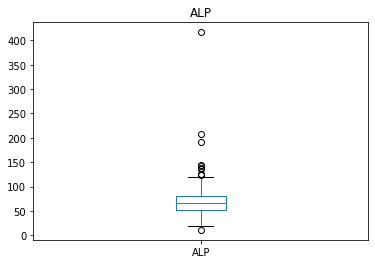

In [14]:
train_df['ALP'].plot(kind='box', title='ALP')

<AxesSubplot:title={'center':'ALT'}>

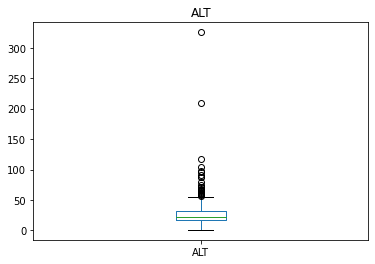

In [15]:
train_df['ALT'].plot(kind='box', title='ALT')

<AxesSubplot:title={'center':'AST'}>

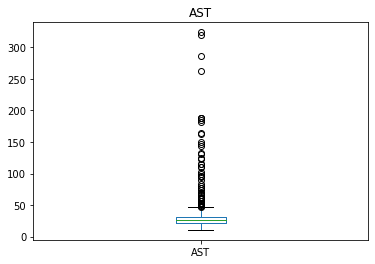

In [16]:
train_df['AST'].plot(kind='box', title='AST')

<AxesSubplot:title={'center':'BIL'}>

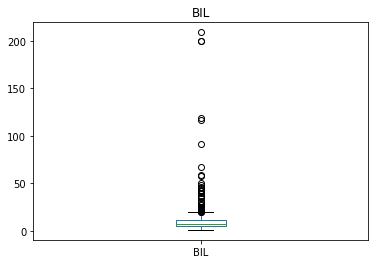

In [17]:
train_df['BIL'].plot(kind='box', title='BIL')

<AxesSubplot:title={'center':'CHE'}>

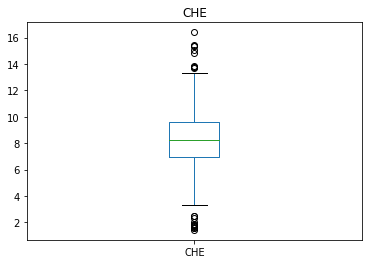

In [18]:
train_df['CHE'].plot(kind='box', title='CHE')

<AxesSubplot:title={'center':'CHOL'}>

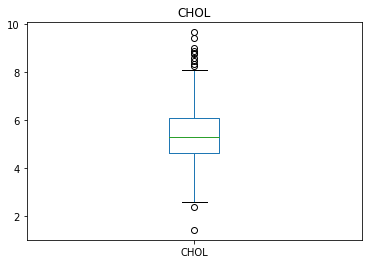

In [19]:
train_df['CHOL'].plot(kind='box', title='CHOL')

<AxesSubplot:title={'center':'CREA'}>

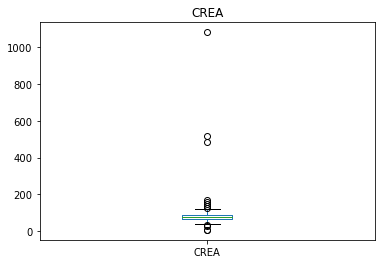

In [20]:
train_df['CREA'].plot(kind='box', title='CREA')

<AxesSubplot:title={'center':'GGT'}>

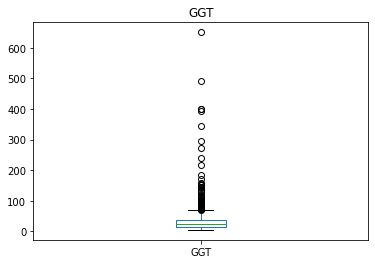

In [21]:
train_df['GGT'].plot(kind='box', title='GGT')

<AxesSubplot:title={'center':'PROT'}>

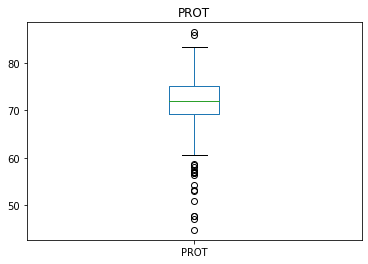

In [22]:
train_df['PROT'].plot(kind='box', title='PROT')

# Matriz de Correlação
Para descobrir se existe alta correlação entre as colunas, foi feita a matriz de correlação. Sendo verificado que, 'ALB' e 'PROT', 'Category' e 'AST' possuem uma correlação moderada. As colunas 'Category' e 'BIL', 'Category' e 'GGT' 'ALB' e 'CHE', 'ALP' e 'GGT', 'AST' e 'BIL', 'AST' e 'GGT', assim como 'CHE' e 'CHOL', possuem uma correlação fraca, e as demais correlação desprezível.

Não foi constatada alta correlação entre as classes.

In [23]:
correlation_col = ['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
df = pd.DataFrame(train_df[correlation_col])
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,1.000000,0.065528,-0.084257,-0.278040,-0.006675,-0.032248,0.633795,0.402728,-0.236488,-0.259247,0.141782,0.479490,-0.118332
Age,0.065528,1.000000,0.015538,-0.191835,0.178287,-0.040269,0.072716,0.039994,-0.076790,0.123749,-0.025003,0.143826,-0.156598
Sex,-0.084257,0.015538,1.000000,-0.150752,0.008205,-0.176780,-0.129788,-0.107692,-0.182332,0.029702,-0.157884,-0.127585,-0.040953
ALB,-0.278040,-0.191835,-0.150752,1.000000,-0.146505,0.039314,-0.177578,-0.169770,0.361318,0.210843,0.001359,-0.147893,0.567577
ALP,-0.006675,0.178287,0.008205,-0.146505,1.000000,0.221691,0.067028,0.058538,0.028980,0.125429,0.153939,0.461444,-0.061643
ALT,-0.032248,-0.040269,-0.176780,0.039314,0.221691,1.000000,0.198659,-0.106722,0.224081,0.149800,-0.036083,0.219781,0.017229
AST,0.633795,0.072716,-0.129788,-0.177578,0.067028,0.198659,1.000000,0.309574,-0.197226,-0.201182,-0.017945,0.477735,0.017421
BIL,0.402728,0.039994,-0.107692,-0.169770,0.058538,-0.106722,0.309574,1.000000,-0.320837,-0.181728,0.019938,0.210674,-0.051800
CHE,-0.236488,-0.076790,-0.182332,0.361318,0.028980,0.224081,-0.197226,-0.320837,1.000000,0.428344,-0.012195,-0.096053,0.303702
CHOL,-0.259247,0.123749,0.029702,0.210843,0.125429,0.149800,-0.201182,-0.181728,0.428344,1.000000,-0.051519,0.008494,0.242899


# Seleção dos Dados
Após realizar a analise dos dados, percebe-se a discrepancia entre doadores e não doadores, como também a presença de outliers em algumas colunas. Desse modo, foi realizada uma normalização dos dados para posterior previsão das demais colunas. 

In [24]:
cols = ['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
        
bf_X = np.array(train_df[cols])
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(bf_X)

y = train_df.Category

# Treinamento e Teste
Agora é preciso fazer o treinamento do algoritmo, o treinamento basicamente vai passar por todas as entradas e achar um padrão que melhor descreve os dados e assim gerar um modelo capaz de prever a saída para novos dados. Sendo dividido em 70% para treino e 30% para teste. 

In [25]:
train_features = ['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
train_target = ['Category']

train_df.drop_duplicates(subset=train_features, keep=False, inplace=True)

train_df = pd.get_dummies(train_df)

x_train, x_test, y_train, y_test = train_test_split(train_df[train_features], train_df[train_target], random_state = 1, stratify=y)

# Algoritmos Supervisionados
Os algoritmos escolhidos para a predição do resultado foram o Decison Tree, Random Forest e o SVM.

O Decison Tree, apesar de ser um algoritmo simples funciona bem para este tipo de problema. Onde os “nós” da árvore e em cada um deles o resultado da decisão será seguir por um caminho, ou por outro. Como este seria uma variação mais simples do random forest, achei interressante ver como se comportaria.

O Random Forest, é um tipo de ensemble learning, método que gera muitos classificadores e combina o seu resultado. Ele gera vários decision trees, cada um com suas particularidades e combinada o resultado da classificação de todos eles. Utiliza um meta-algoritmo de bagging, que reduz a variância e overfitting, com métodos de aproximação da média. 

A escolha da SVM foi por seu caráter linear, sendo considerado o melhor algoritmo para a classificação entre duas classes.

In [26]:
classifier_dt = DecisionTreeClassifier(random_state=1986, criterion='gini', max_depth=3).fit(x_train, y_train)

predict_dt = classifier_dt.predict(x_test)

print("Accuracy:", round(classifier_dt.score(x_test, y_test)*100, 2),'%')

print("Sensibility score:", round(metrics.precision_score(y_test, predict_dt), 2))
print("Specificity score:", round(metrics.recall_score(y_test, predict_dt), 2))

cm_decision = metrics.confusion_matrix(y_test, predict_dt)
print("Confusion matrix:\n", cm_decision)

Accuracy: 95.27 %
Sensibility score: 0.91
Specificity score: 0.62
Confusion matrix:
 [[131   1]
 [  6  10]]


In [27]:
classifier_rf = RandomForestClassifier(n_jobs=1, random_state=5, n_estimators=10).fit(x_train, y_train)

predict_rf = classifier_rf.predict(x_test)

print("Accuracy:", round(classifier_rf.score(x_test, y_test)*100, 2),'%')

print("Sensibility score:", round(metrics.precision_score(y_test, predict_rf), 2))
print("Specificity score:", round(metrics.recall_score(y_test, predict_rf), 2))

cm_random = metrics.confusion_matrix(y_test, predict_rf)
print("Confusion matrix:\n", cm_random)

Accuracy: 95.95 %
Sensibility score: 1.0
Specificity score: 0.62
Confusion matrix:
 [[132   0]
 [  6  10]]


In [28]:
classifier_svm = svm.SVC(kernel='linear', C=10).fit(x_train, y_train)

predict_svm = classifier_svm.predict(x_test)

print("Accuracy:", round(classifier_svm.score(x_test, y_test)*100, 2),'%')

print("Sensibility score:", round(metrics.precision_score(y_test, predict_svm), 2))
print("Specificity score:", round(metrics.recall_score(y_test, predict_svm), 2))

svm_decision = metrics.confusion_matrix(y_test, predict_svm)
print("Confusion matrix:\n", svm_decision)

Accuracy: 96.62 %
Sensibility score: 1.0
Specificity score: 0.69
Confusion matrix:
 [[132   0]
 [  5  11]]


A acurácia mede a proximidade da medida para um determinado valor;

Especificidade mede a porção de verdadeiros negativos em relação ao total de negativos. 

Sensibilidade mede a porção de verdadeiros positivos em relação ao total de positivos. 

A matriz de confusão é dividida da seguinte forma, temos que Matriz[0][0] = Verdadeiro negativo, Matriz[0][1] = Falso positivo
matriz[1][0] = Falso negativo, matriz[1][1] = Verdadeiro positivo.

# Relatório de Classificação
Com auxilio da função classification_report é possivel analisar melhor o recall (que vai nos mostrar com maior clareza que a base está enviesada), e outras funções como a f1-score e precision.

In [29]:
print(metrics.classification_report(y_test, predict_dt))
print(metrics.classification_report(y_test, predict_rf))
print(metrics.classification_report(y_test, predict_svm))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       132
           1       0.91      0.62      0.74        16

    accuracy                           0.95       148
   macro avg       0.93      0.81      0.86       148
weighted avg       0.95      0.95      0.95       148

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       132
           1       1.00      0.62      0.77        16

    accuracy                           0.96       148
   macro avg       0.98      0.81      0.87       148
weighted avg       0.96      0.96      0.96       148

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       132
           1       1.00      0.69      0.81        16

    accuracy                           0.97       148
   macro avg       0.98      0.84      0.90       148
weighted avg       0.97      0.97      0.96       148



Apesar da acurácia alta e mesmo sendo uma das maneiras de verificar a qualidade do modelo. Por a base está desbalanceada ela não é a melhor métrica de avaliação do modelo.

Note que o recall (número de acertos) para a classe 0 é muito alta em todos os algoritmos, por outro lado é menor para a classe 1 também em todos.

Isso só reforça o que já sabemos, nosso modelo está enviesado, ele aprendeu mais sobre a classe que tinha uma maior quantidade de exemplos.

A matriz de confusão nos mostra o número exato de registros classificados por classe.

Temos 6 registos classificados como sendo da classe 0 quando na verdade eram da classe 1. (Decison Tree e Random Forest);
Temos 5 registos classificados como sendo da classe 0 quando na verdade eram da classe 1. (SVM).

# Aplicando NearMiss para Balanceamento das Classes
Como foi mostrado no histograma das classes Doador e Não doador existe um desbalancemento grande entres as classes. O que comprometeu nossa previsão como é constatada pelo recall e também na matriz e confusão, sendo assim foi utilizado o NearMiss que é um algoritmo de undersampling que consiste em reduzir de forma aleatória os exemplos da classe majoritária. Ele seleciona os exemplos com base na distância, ou seja, quando instâncias das duas classes estão muito próximas umas das outras, removemos as instâncias da classe majoritária para termos uma maior separabilidade entre as classes.

In [30]:
X = df.drop("Category", axis = 1)
y = df.Category

In [31]:
nr = NearMiss()

In [32]:
X, y = nr.fit_sample(X, y)

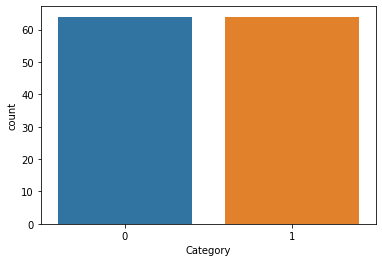

In [33]:
ax = sns.countplot(x=y)

1    64
0    64
Name: Category, dtype: int64


<AxesSubplot:ylabel='Frequency'>

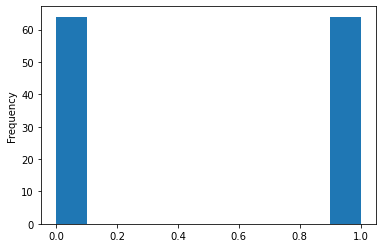

In [34]:
print(y.value_counts())
y.plot(kind='hist')

# Separando as classes balanceadas em treino e teste
Da mesma forma que para os dados Não balanceados, os dados foram divididos em 70% para treino e 30% para teste.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

# Algoritmos Supervisionados nas classes balanceadas
A seguir, é possivel notar que após o balanceamento das classes a acurácia diminuio para o Decison tree e para o SVM, e aumentou para o Randon Forest. 

In [36]:
classifier_dt = DecisionTreeClassifier(random_state=1986, criterion='gini', max_depth=3).fit(X_train, y_train)

predict_dt = classifier_dt.predict(X_test)

print("Accuracy:", round(classifier_dt.score(X_test, y_test)*100, 2),'%')

print("Sensibility score:", round(metrics.precision_score(y_test, predict_dt), 2))
print("Specificity score:", round(metrics.recall_score(y_test, predict_dt), 2))

cm_decision = metrics.confusion_matrix(y_test, predict_dt)
print("Confusion matrix:\n", cm_decision)

Accuracy: 90.62 %
Sensibility score: 0.93
Specificity score: 0.88
Confusion matrix:
 [[15  1]
 [ 2 14]]


In [37]:
classifier_rf = RandomForestClassifier(n_jobs=1, random_state=5, n_estimators=10).fit(X_train, y_train)

predict_rf = classifier_rf.predict(X_test)

print("Accuracy:", round(classifier_rf.score(X_test, y_test)*100, 2),'%')

print("Sensibility score:", round(metrics.precision_score(y_test, predict_rf), 2))
print("Specificity score:", round(metrics.recall_score(y_test, predict_rf), 2))

cm_random = metrics.confusion_matrix(y_test, predict_rf)
print("Confusion matrix:\n", cm_random)

Accuracy: 96.88 %
Sensibility score: 1.0
Specificity score: 0.94
Confusion matrix:
 [[16  0]
 [ 1 15]]


In [38]:
classifier_svm = svm.SVC(kernel='linear', C=10).fit(X_train, y_train)

predict_svm = classifier_svm.predict(X_test)

print("Accuracy:", round(classifier_svm.score(X_test, y_test)*100, 2),'%')

print("Sensibility score:", round(metrics.precision_score(y_test, predict_svm), 2))
print("Specificity score:", round(metrics.recall_score(y_test, predict_svm), 2))

svm_decision = metrics.confusion_matrix(y_test, predict_svm)
print("Confusion matrix:\n", svm_decision)

Accuracy: 87.5 %
Sensibility score: 0.93
Specificity score: 0.81
Confusion matrix:
 [[15  1]
 [ 3 13]]


In [39]:
print(metrics.classification_report(y_test, predict_dt))
print(metrics.classification_report(y_test, predict_rf))
print(metrics.classification_report(y_test, predict_svm))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.93      0.88      0.90        16

    accuracy                           0.91        32
   macro avg       0.91      0.91      0.91        32
weighted avg       0.91      0.91      0.91        32

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.94      0.97        16

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.93      0.81      0.87        16

    accuracy                           0.88        32
   macro avg       0.88      0.88      0.87        32
weighted avg       0.88      0.88      0.87        32



É bastante perceptivel que após o balanceamento das classes o recall da classe 1 melhorou significativamente em todos os algoritmos, pois agora temos a mesma quantidade de exemplos para ambas as classes.

Percebe-se também através da análise das matrizes de confussão dos 3 algoritmos que o número de registros errados é quase que o mesmo para as duas classes, podemos dizer que nosso modelo não está mais enviesado nesse cenário.

E que não houve grandes diferenças entre o Decission tree e Random Forest neste caso.